# `Abstract :` 

This project mainly focuses on handling imbalanced datasets and detecting credit-card frauds using Following Machine Learning Algorithms:

a) Logistic Regression

b) RandomForestClassifier
 

These models are fittted to different datasets acquired after StandardScaler, Oversampling, Undersampling and SMOTE techniques.
Thus, separate files are created for each Machine Learning Models so that every datasets acquired after above mentioned techniques are fitted separately to our model using single function.


### ABOUT DATASETS: 

This datasets have 492 frauds out of 284,807 transactions. It is highly unbalanced, the positive class--1 (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features are not provided and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.But, we did not consider `Time` for training purpose as it is of no use to build the models and may not impact our target variable.

The feature `Amount` is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

Feature `Class` is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### `STEPS : `
 

1) Importing Libraries & Loading Datasets.

2) Data Preprocessing & Preparing Datasets.

3) Exploratoty Data Analysis(EDA) & Visualization.
  
4) Handling Imbalanced Datasets. 

5) Conclusions.


# `STEP-1:` Importing Libraries & Loading Datasets.

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as style # for text customization

### Loading Datasets

In [6]:
main_df = pd.read_csv("creditcard.csv", )
main_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


# `STEP-2:` Data Preprocessing & Preparing Datasets.

Checking for any missing values...

In [9]:
main_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [10]:
main_df.isnull().values.any()

True

Checking info of our datasets...

In [12]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170463 entries, 0 to 170462
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170463 non-null  float64
 1   V1      170463 non-null  float64
 2   V2      170463 non-null  float64
 3   V3      170463 non-null  float64
 4   V4      170463 non-null  float64
 5   V5      170463 non-null  float64
 6   V6      170463 non-null  float64
 7   V7      170463 non-null  float64
 8   V8      170463 non-null  float64
 9   V9      170463 non-null  float64
 10  V10     170463 non-null  float64
 11  V11     170463 non-null  float64
 12  V12     170463 non-null  float64
 13  V13     170463 non-null  float64
 14  V14     170463 non-null  float64
 15  V15     170463 non-null  float64
 16  V16     170463 non-null  float64
 17  V17     170463 non-null  float64
 18  V18     170462 non-null  float64
 19  V19     170462 non-null  float64
 20  V20     170462 non-null  float64
 21  V21     17

Observing Statistical Distribution of Datasets...

In [14]:
main_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,...,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000
mean,60945.692185,-0.171418,0.041438,0.496009,0.118163,-0.177346,0.058682,-0.081195,0.032564,0.019095,...,-0.028654,-0.084279,-0.022592,0.009210,0.092750,0.012698,0.002063,0.002476,87.323837,0.002112
std,27706.565970,1.850499,1.611466,1.382129,1.371813,1.338482,1.295161,1.208874,1.228228,1.152669,...,0.743809,0.667001,0.584789,0.598609,0.465168,0.490741,0.392259,0.307549,246.031624,0.045907
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,41172.500000,-0.987177,-0.538322,-0.061200,-0.742708,-0.829775,-0.690531,-0.586555,-0.162257,-0.660021,...,-0.230739,-0.546821,-0.170281,-0.332191,-0.195154,-0.330339,-0.065088,-0.026686,5.470000,0.000000
50%,60665.000000,-0.185295,0.110233,0.625232,0.124920,-0.227397,-0.202146,-0.032314,0.056915,-0.079157,...,-0.054634,-0.067189,-0.036388,0.059690,0.136222,-0.059032,0.008744,0.021198,21.860000,0.000000
75%,78493.000000,1.183845,0.804500,1.298406,0.938294,0.372807,0.449766,0.462061,0.351272,0.641997,...,0.127892,0.362294,0.098484,0.415848,0.399693,0.273055,0.089745,0.078337,76.677500,0.000000
max,120194.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


### Droping `Time` Attribute

It is of no use to build the models and may not impact our target variable.

In [16]:
main_df.drop('Time', axis=1, inplace=True)
main_df.dropna(inplace=True)  #drop all rows having NaN values all across columns

### Now, X and y are our normal datasets..

In [18]:
X = main_df.drop('Class', axis=1)
y = main_df['Class']
X.shape, y.shape

((170462, 29), (170462,))

### Normalizing `Amount`attribute values using `StandardScaler`

I've tried with `MinMaxScaler` and got similar results. You can also try and experiment with various scaling techniques.

In [20]:
temp_df = main_df.copy()

In [21]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
amount = temp_df['Amount'].values
temp_df['Amount'] = standard.fit_transform(amount.reshape(-1,1))
X_scaled = temp_df.drop('Class', axis=1)
y_scaled = temp_df['Class']
X_scaled.shape, y_scaled.shape

((170462, 29), (170462,))

In [22]:
main_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


# `STEP-3:` Exploratoty Data Analysis(EDA) & Visualization.

### Making data ready for Plotting of Count values of Different Classes...

In [25]:
class_count_df = pd.DataFrame(main_df['Class'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class'].replace({0:'Normal',
                                 1:'Fraud'}, inplace=True)
class_count_df.head()

C:\Users\subham.mehta\AppData\Local\Temp\ipykernel_12876\1341184513.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  class_count_df['Class'].replace({0:'Normal',


,Class,Counts
0,Normal,170102
1,Fraud,360


In [26]:
# fig = plt.figure()
# fig.set_figheight(8)
# fig.set_figwidth(10)
# plt.bar(class_count_df['Class'], class_count_df['Counts'],color=['green','red']);

## `BAR_GRAPH`

C:\Users\subham.mehta\AppData\Local\Temp\ipykernel_12876\1475047372.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
C:\Users\subham.mehta\AppData\Local\Temp\ipykernel_12876\1475047372.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')


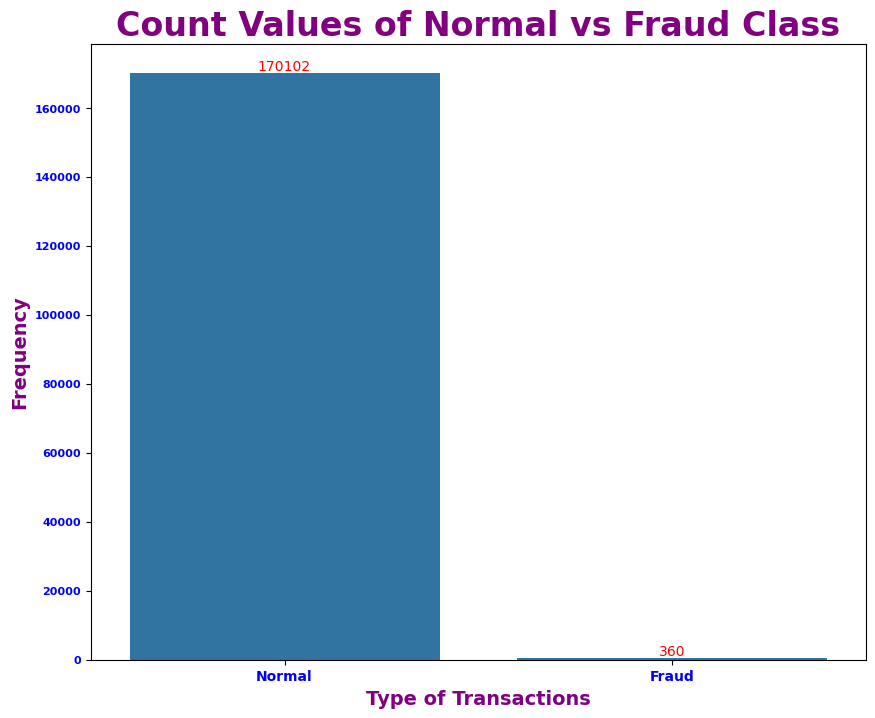

In [28]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

ax = sns.barplot(x=class_count_df['Class'],
                 y=class_count_df['Counts'])

ax.bar_label(ax.containers[0], color='red') ## Showing Values at top of Each Bar.

ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
labels, location = plt.yticks()
ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')

plt.xlabel(xlabel='Type of Transactions', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Frequency', fontsize=14, fontweight='bold').set_color('purple')
plt.title(label='Count Values of Normal vs Fraud Class', fontsize=24, fontweight='bold').set_color('purple')

### Analyzing before plotting graph of Variation of `Amount` per `Class`

In [30]:
fraud = main_df[main_df['Class'] == 1]
normal = main_df[main_df['Class'] == 0]
fraud.shape, normal.shape

((360, 30), (170102, 30))

In [31]:
fraud_frc = len(fraud)/float(len(main_df))
fraud_frc

0.002111907639239244

In [32]:
print(f"Percentage of Fraud Tnx in datasets : {fraud_frc*100:.2f}%")

Percentage of Fraud Tnx in datasets : 0.21%


In [33]:
fraud.Amount.describe()

count     360.000000
mean      111.576722
std       227.309252
min         0.000000
25%         1.000000
50%        11.385000
75%       104.007500
max      1809.680000
Name: Amount, dtype: float64

In [34]:
normal.Amount.describe()

count    170102.000000
mean         87.272509
std         246.067820
min           0.000000
25%           5.490000
50%          21.890000
75%          76.500000
max       19656.530000
Name: Amount, dtype: float64

## `HISTOGRAM`

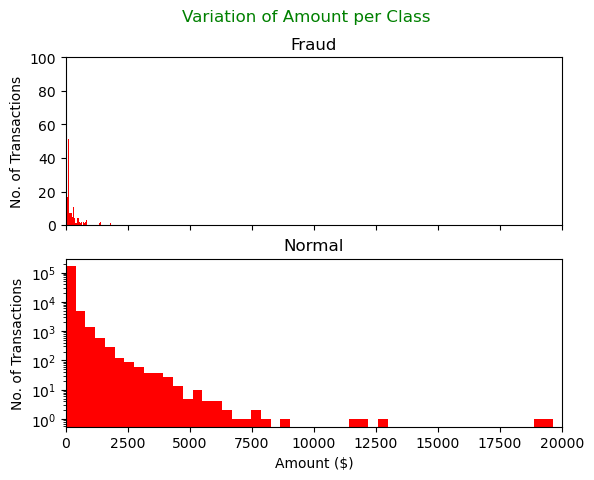

In [36]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraud['Amount'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(normal['Amount'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

# `STEP-4:` Handling Imbalanced Datasets. 

## 1) Choose Proper Evaluation Metrics
Accuracy may be good enough for a well-balanced class but not ideal for the imbalanced class problem. The other metrics like precision( measure of how accurate the classifier’s prediction of a specific class ) and recall ( measure of the classifier’s ability to identify a class ) are also considered.

For an imbalanced class dataset, `F1 score` is a more appropriate metric. `F1 score` is defined as the harmonic mean between precision and recall. It is used as a statistical measure to rate performance.  F1-score ranges between 0 and 1. The closer it is to 1, the better the model.

## 2) Resampling(Undersampling and Oversampling)

### OverSampling

In [41]:
main_df.Class.value_counts()

Class
0.0    170102
1.0       360
Name: count, dtype: int64

In [42]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = main_df[(main_df['Class']==0)] 
df_minority = main_df[(main_df['Class']==1)]

# upsample minority class
df_minority_oversampled = resample(df_minority,
                                 replace=True,
                                 n_samples=284315,
                                 random_state=42)
# Combine majority class with upsampled minority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
df_oversampled.Class.value_counts()

Class
1.0    284315
0.0    170102
Name: count, dtype: int64

Final Sampled Dataset:

In [44]:
X_oversampled = df_oversampled.drop('Class', axis=1)
y_oversampled = df_oversampled['Class']
X_oversampled.shape, y_oversampled.shape

((454417, 29), (454417,))

### Undersampling

In [46]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)

X_undersampled, y_undersampled = rus.fit_resample(X, y)
print(f"The number of Classes before the fit {Counter(y)}")
print(f"The number of Classes after the fit {Counter(y_undersampled)}")

The number of Classes before the fit Counter({0.0: 170102, 1.0: 360})
The number of Classes after the fit Counter({0.0: 360, 1.0: 360})


## 3) SMOTE(Synthetic Minority Oversampling Technique)

Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [54]:
#!pip install --upgrade scikit-learn imbalanced-learn
from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.

X_smote, y_smote = sm.fit_resample(main_df.drop('Class', axis=1), main_df['Class'])
smote_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
X_smote.shape

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 991.0 kB/s eta 0:00:12
   ---------------------------------------- 0.1/11.0 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.4/11.0 MB 2.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/11.0 MB 3.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/11.0 MB 5.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.0 MB 5.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.0 MB 5.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.0 MB 5.2 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.0 MB 5.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.0 MB 5.4 MB/s eta 0:00:02
   ---------- ----------------------------- 2.8/11.0 MB 5.9 MB/s eta 0:00:02
   ------------ --------------------------- 3.5/11.0 MB 6.8 MB/s eta 0:00:02
   -

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
X_smote.shape

In [ ]:
smote_df.Class.value_counts()

# `STEP-5:` Conclusions:

a) Out of all 6 Machine Learning Models used, Random Forest Classifier works efficiently with Maximum `Accuracy` of `99.996483% `and `macro-average of F1-Score` of `1.00` acheived with `Oversampling` technique.

b) Oversampling Techniques proved to be efficient for handling Imbalanced Datasets.

c) RandomForest, XGBoost, DecisionTree, K-Neighbors work efficiently even for this Imbalanced Datasets.

d) RandomForest takes lots of Training Time among all of Six models used.